<a href="https://colab.research.google.com/github/NoahLee99/ML-DL-studylog/blob/main/Chapter%2007_3%20-%20%EC%8B%A0%EA%B2%BD%EB%A7%9D%20%EB%AA%A8%EB%8D%B8%20%ED%9B%88%EB%A0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
키워드 = [드롭아웃, 콜백, 조기 종료]
- 드롭아웃: 은닉층에 있는 뉴런의 출력을 랜덤하게 꺼서 과대적합을 막는 기법이다.
            드롭아웃은 훈련 중에 적용되며 평가나 예측에서는 적용하지 않는다.
            텐서플로는 이를 자동으로 처리한다.
- 콜백: 케라스 모델을 훈련한느 도중에 어떤 작업을 수행할 수 있도록 도와주는 도구이다.
        대표적으로 최상의 모델을 자동으로 저장해 주거나 검증 검주삭 더 이상 향상되지 않으면 일찍 종료할 수 있다.
- 조기 종료: 검증 점수가 더 이상 감소하지 않고 상하여 과대적합이 일어나면 훈련을 계속 진행하지 않고 멈추는 기법이다.
           이렇게 하면 계산 비용과 시간을 절약할 수 있다.

핵심 패키지 및 함수 = [Dropout, save_weights(), load_weights(), save(),
                        load_model(), ModelCheckpoint, EarlyStopping, argmax]
- Dropout: 드롭아웃 층이며, 첫 번째 매개변수로 드롭아웃 할 비율(r)을 지정한다.
           드롭아웃 하지 않는 뉴런의 출력은 1/(! - r)만큼 증가시켜 출력의 총합이 같도록 만듭니다.
- save_weights(): 모든 층의 가중치와 절편을 파일에 저장한다.
                  첫 번째 매개변수에 저장할 파일을 지정한다.
                  save_format 매개변수에서 저장할 파일 포맷을 지정한다.
                  기본적으로 텐서플로의 Checkpoint 포맷을 사용한다.
- load_weights(): 모든 층의 가중치와 절편을 파일에 읽는다.
                  첫 번째 매개변수에 읽을 파일을 지정한다.
- save(): 모델 구조와 모든 가중치와 절편을 파일에 저장한다.
          첫 번째 매개변수에 저장할 파일을 지정한다.
          save_format 매개변수에서 저장할 파일 포맷을 지정한다.
          기본적으로 텐서플로의 SavedModel 포맷을 사용한다.
- load_model(): model.save()로 저장된 모델을 로드한다.
                첫 번째 매개변수에 읽을 파일을 지정한다.
-Modelcheckpoint: 케라스 모델과 가중치를 일정 간격으로 저장한다.
                  첫 번째 매개변수에 저장할 파일을 지정한다.
                  monitor 매개변수는 모니터링할 지표를 지정한다.
                  기본값은 'val_loss'로 검증 손실을 관찰한다.
                  save_weights_only 매개변수의 기본값은 False로 전체 모델을 저장한다.
                  True로 지정하면 모델의 가중치와 절편만 저장한다.
                  save_best_only 매개변수를 True로 지정하면 가장 낮은 검증 점수를 만드는 모델을 저장한다.
- EarlyStopping: 관심 지표가 더이상 향상하지 않으면 훈련을 중지한다.
                 monitor 매개변수는 모니터링할 지표를 지정한다.
                 기본값은 'val_loss'로 검증 손실을 관찰한다.
                 patience 매개변수에 모델이 더 이상 향상되지 않고 지속할 수 있는 최대 에포크 횟수를 지정한다.
                 restore_best_weights 매개변수에 최상의 모델 가중치를 복원할지 지정한다.
                 기본값은 False이다.
- argmax: 배열에서 축을 따라 최댓값의 인덱스를 반환한다.
          axis 매개변수에서 어떤 축을 따라 최댓값을 찾을지 지정한다.
          기본값은 None으로 전체 배열에서 최댓값을 찾는다.

이번 장에서는 케라스 API를 사용해 모델을 훈련하는데 필요한 다양한 도구들을 알아볼 것이다.
이 과정에서 여러 가지 중요한 개념과 모범 사례를 함께 살펴보겠다.
'''

'\n지금까지 인공 신경망에 대해 배우고 텐서플로의 케라스 API를 사용해 직접 만들어 보았다.\n1개 이상의 층을 추가하여 심층 신경망을 구성하고 다양한 고급 옵티마이저를 적용하는 방법도 알아보았다.\n\n이전에 배웠던 머신러닝 알고리즘과는 어떤 차이가 있었나?\n일반적으로 사이킷런에서 제공하는 머실러닝 알고리즘들은 좋은 성능을 내기 위해 매개변수를 조정하고 훈련하는 과정을 반복한다.\n이런 알고리즘들은 모델의 구조가 어느 정도 고정되어 있다고 느낄 수 있다.\n\n반면에 딥러닝에서는 모델의 구조를 직접 만든다는 느낌이 훨씬 강하다.\n층을 추가하고 층에 있는 뉴런의 개수와 활성화 함수를 결정하는 일들이 그렇다.\n그래서인지 프로그래머에게는 텐서플로, 케라스와 같은 딥러닝 라이브러리가 조금 더 친숙하게 느껴질 수 있다.\n딥러닝 분야에서는 연구자와 프로그래머가 더 밀접하게 일하게 되는 것 같다고 한다.\n\n이번 장에서는 케라스 API를 사용해 모델을 훈련하는데 필요한 다양한 도구들을 알아볼 것이다.\n이 과정에서 여러 가지 중요한 개념과 모범 사례를 함께 살펴보겠다.\n'

# **손실 곡선**

In [ ]:
'''
07-2장에서는 fit() 메서드로 모델을 훈련하면 훈련 과정이 상세하게 출력되어 확인할 수 있었다.
여기에는 에포크 횟수, 손실, 정확도 등이 있었다.
그런데 이 출력의 마지막에 다음과 같은 메세지를 본 기억이 나는가?

<tensorflow.pytho.keras.callbacks.History at 0x7fef38bfc080>

노트북의 코드 셀은 print() 명령을 사용하지 않더라도 마지막 라인의 실행 결과를 자동으로 출력한다.
즉 이 메세지는 fit() 메서드의 실행 결과를 출력한 것이다.
다시 말해 fit() 메서드가 무엇인가 반환한다는 증거이다.
History 객체에는 훈련 과정에서 계산한 지표, 즉 손실과 정확도 값이 저장되어 있다.
이 값을 사용하면 그래프를 그릴 수 있을 듯하다.

먼저 이전 장에서 사용했던 것과 같이 패션 MNIST 데이터셋을 적재하고 훈련 세트와 검증 세트로 나눈다.
'''

'\n07-2장에서는 fit() 메서드로 모델을 훈련하면 훈련 과정이 상세하게 출력되어 확인할 수 있었다.\n여기에는 에포크 횟수, 손실, 정확도 등이 있었다.\n그런데 이 출력의 마지막에 다음과 같은 메세지를 본 기억이 나는가?\n\n<tensorflow.pytho.keras.callbacks.History at 0x7fef38bfc080>\n\n노트북의 코드 셀은 print() 명령을 사용하지 않더라도 마지막 라인의 실행 결과를 자동으로 출력한다.\n즉 이 메세지는 fit() 메서드의 실행 결과를 출력한 것이다.\n다시 말해 fit() 메서드가 무엇인가 반환한다는 증거이다.\nHistory 객체에는 훈련 과정에서 계산한 지표, 즉 손실과 정확도 값이 저장되어 있다.\n이 값을 사용하면 그래프를 그릴 수 있을 듯하다.\n\n먼저 이전 장에서 사용했던 것과 같이 패션 MNIST 데이터셋을 적재하고 훈련 세트와 검증 세트로 나눈다.\n'

In [ ]:
# 패션 MNIST 데이터셋 적재 및 훈련 세트 검증 세트 나누기
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# 모델 생성을 위한 함수 정의
def model_fn(a_layer=None):
  model = keras.Sequential()

  model.add(keras.layers.Flatten(input_shape=(28, 28)))
  model.add(keras.layers.Dense(100, activation='relu'))
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10, activation='softmax'))
  return model

In [ ]:
'''
if 구문을 제외하면 이 코드는 지전 장에서 만든 것과 동일한 모델을 만든다.
if 구문의 역할은 model_fn() 함수에 (a_layer 매개변수로) 케라스 층을 추가하면 은닉층 뒤에 또 하나의 층을 추가하는 것이다.
신경망 모델을 만드는 것이 마치 프로그래밍을 하는 것 같은 느낌이다.

여기서는 a_layer 매개변수로 층을 추가하지 않고 단순하게 model_fn() 함수를 호출한다.
그리고 모델 구조를 출력하면 이전 절과 동일한 모델이라는 것을 확인할 수 있다.
'''

'\nif 구문을 제외하면 이 코드는 지전 장에서 만든 것과 동일한 모델을 만든다.\nif 구문의 역할은 model_fn() 함수에 (a_layer 매개변수로) 케라스 층을 추가하면 은닉층 뒤에 또 하나의 층을 추가하는 것이다.\n신경망 모델을 만드는 것이 마치 프로그래밍을 하는 것 같은 느낌이다.\n\n여기서는 a_layer 매개변수로 층을 추가하지 않고 단순하게 model_fn() 함수를 호출한다.\n그리고 모델 구조를 출력하면 이전 절과 동일한 모델이라는 것을 확인할 수 있다.\n'

In [ ]:
# 생선한 모델의 구조 출력
model = model_fn()

model.summary()

# 이전 장에서 만든 동일한 모델인 것을 확인할 수 있음'

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 모델 훈련의 결과를 변수에 담기
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

In [ ]:
'''
verbose=0이란?
verbose 매개변수는 훈련 과정 출력을 조절한다.
기본값은 1로 이전 장에서처럼 에포크마다 진행 막대와 함께 손실 등의 지표가 출력된다.
2로 바꾸면 진행 막대를 빼고 출력된다.
이번 장에서는 훈련 결과를 그래프로 나타내는 대신 verbose 매개변수를 0으로 지정하여 훈련 과정을 나타내지 않겠다.
'''

'\nverbose=0이란?\nverbose 매개변수는 훈련 과정 출력을 조절한다.\n기본값은 1로 이전 장에서처럼 에포크마다 진행 막대와 함께 손실 등의 지표가 출력된다.\n2로 바꾸면 진행 막대를 빼고 출력된다.\n이번 장에서는 훈련 결과를 그래프로 나타내는 대신 verbose 매개변수를 0으로 지정하여 훈련 과정을 나타내지 않겠다.\n'

In [ ]:
# history 딕셔너리 값 확인
print(history.history.keys())

dict_keys(['accuracy', 'loss'])


In [ ]:
'''
history에는 손실과 정확도 키값이 포함되어 있다.
이전 장에서 언급했듯이 케라스는 기본적으로 에포크마다 손실을 계산한다.
정확도는 compile() 메서드에서 metrics 매개변수에 'accuracy'를 추가했기 때문에 history 속성에 포함되어있다.

histroy 속성에 포함된 손실과 정확도는 에포크마다 계산한 값이 순서대로 나열된 단순한 리스트이다.
멧플롯립을 사용해 쉽게 그래프로 그릴 수 있다.
'''

"\nhistory에는 손실과 정확도 키값이 포함되어 있다.\n이전 장에서 언급했듯이 케라스는 기본적으로 에포크마다 손실을 계산한다.\n정확도는 compile() 메서드에서 metrics 매개변수에 'accuracy'를 추가했기 때문에 history 속성에 포함되어있다.\n\nhistroy 속성에 포함된 손실과 정확도는 에포크마다 계산한 값이 순서대로 나열된 단순한 리스트이다.\n멧플롯립을 사용해 쉽게 그래프로 그릴 수 있다.\n"

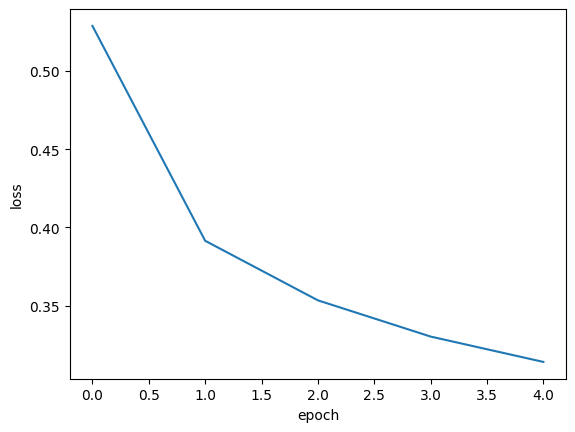

In [ ]:
# history 그래프 시각화
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# 파이썬 리스트의 인덱스는 0부터 시작하므로 5개의 에포크가 0에서부터 4까지 x축에 표현되며 y축은 계산된 손실 값임

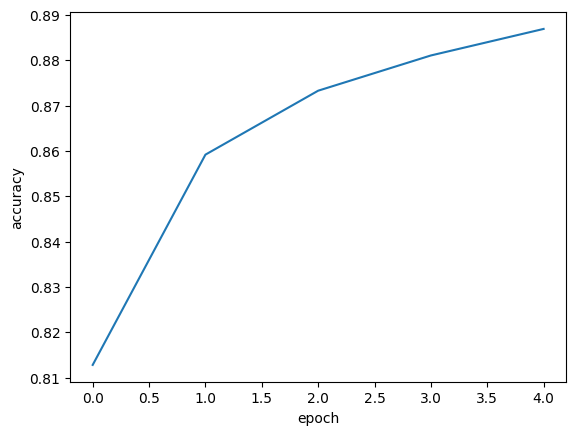

In [ ]:
# 정확도 출력
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

# 에포크마다 손실이 감소하고 정확도가 향상됨을 알 수 있음 --> 에포크를 더 늘려서 성능을 높여보자!

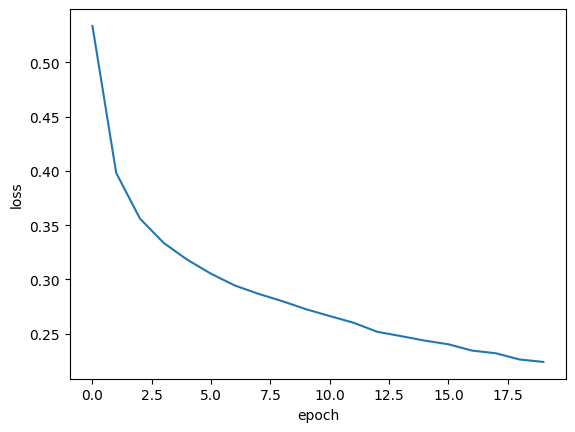

In [ ]:
# 에포크를 20으로 늘려 모델 훈련 후 손실 그래프 그리기
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0)

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# **검증 손실**

In [ ]:
'''
에포크에 따른 과적합을 파악하려면 훈련 세트에 대한 점수뿐만 아니라 검증 세트에 대한 점수도 필요하다.
따라서 앞에서처럼 훈련 세트의 손실만 그려서는 안 된다.
4장에서는 정확도를 사용하여 과적합을 설명했지만 이 장에서는 손실을 사용하여 과적합을 다루겠다.

손실을 사용하는 것과 정확도를 사용하는 것은 어떤 차이가 있을까?
인공 신경망 모델이 최적화하는 대상은 정확도가 아니라 손실 함수이다.
이따금 손실 감소에 비례하여 정확도가 높아지지 않는 경우도 있다.
따라서 모델이 잘 훈련되었는지 판단하려면 정확도보다는 손실 함수의 값을 확인하는 것이 더 낫다.

에포크마다 검증 손실을 계산하기 위해 케라스 모델의 fit() 메서드에 검증 데이터를 전달할 수 있다.
다음처럼 validation_data 매개변수에 검증에 사용할 입력과 타깃값을 튜플로 만들어 전달한다.
'''

'\n4장에서 확률적 경사 하강법을 사용했을 때 과적합과 에포크 사이의 관계를 알아보았다.\n인공 신경망은 모두 일종의 경사 하강법을 사용하기 때문에 동일한 개념이 여기에도 적용된다.\n\n에포크에 따른 과적합을 파악하려면 훈련 세트에 대한 점수뿐만 아니라 검증 세트에 대한 점수도 필요하다.\n따라서 앞에서처럼 훈련 세트의 손실만 그려서는 안 된다.\n4장에서는 정확도를 사용하여 과적합을 설명했지만 이 장에서는 손실을 사용하여 과적합을 다루겠다.\n\n손실을 사용하는 것과 정확도를 사용하는 것은 어떤 차이가 있을까?\n인공 신경망 모델이 최적화하는 대상은 정확도가 아니라 손실 함수이다.\n이따금 손실 감소에 비례하여 정확도가 높아지지 않는 경우도 있다.\n따라서 모델이 잘 훈련되었는지 판단하려면 정확도보다는 손실 함수의 값을 확인하는 것이 더 낫다.\n\n에포크마다 검증 손실을 계산하기 위해 케라스 모델의 fit() 메서드에 검증 데이터를 전달할 수 있다.\n다음처럼 validation_data 매개변수에 검증에 사용할 입력과 타깃값을 튜플로 만들어 전달한다.\n'

In [ ]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

In [ ]:
# 변환된 history 딕셔너리 값 확인
print(history.history.keys())

# 검증 세트에 대한 손실은 'val_loss'에 들어 있고 정확도는 'val_accuracy'에 들어 있을 것임

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


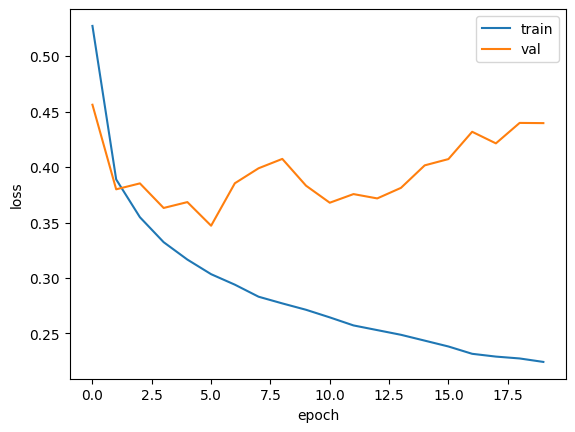

In [ ]:
# 과적합 문제 조사를 위해 훈련 손실과 검증 손실을 그래프로 비교
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
'''
초기에 검증 손실이 감소하다가 다섯 번째 에포크 만에 다시 상승하기 시작한다.
훈련 손실은 꾸준히 감소하기 때문에 전형적인 과대적합 모델이 만들어진다.
검증 손실이 다시 상승하는 시점을 가능한 뒤로 늦추면 검증 세트에 대한 손실이 줄어들 뿐만 아니라 검증 세트에 대한 정확도도 증가할 것이다.

과대적합을 막기 위해 3장에서 배웠떤 규제 방식 대신에 신경망에 특화된 규제 방법을 다음 섹션에서 다루어 보겠다.
당장은 옵티마이저 하이퍼파라미터를 조정하여 과대적합을 완화시킬 수 있는지 알아보겠다.

기본 RMSprop 옵티마이저는 많은 문제에서 잘 동작한다.
만약 이 옵티마이저 대신 다른 옵티마이저를 테스트해 본다면 Adam이 좋은 선택이다.
Adam은 적응적 학습률을 사용하기 때문에 에포크가 진행되면서 학습률의 크기를 조정할 수 있다.
Adam 옵티마이저를 적용해 보고 훈련 손실과 검증 손실을 다시 그려 보자.
'''

'\n초기에 검증 손실이 감소하다가 다섯 번째 에포크 만에 다시 상승하기 시작한다.\n훈련 손실은 꾸준히 감소하기 때문에 전형적인 과대적합 모델이 만들어진다.\n검증 손실이 다시 상승하는 시점을 가능한 뒤로 늦추면 검증 세트에 대한 손실이 줄어들 뿐만 아니라 검증 세트에 대한 정확도도 증가할 것이다.\n\n과대적합을 막기 위해 3장에서 배웠떤 규제 방식 대신에 신경망에 특화된 규제 방법을 다음 섹션에서 다루어 보겠다.\n당장은 옵티마이저 하이퍼파라미터를 조정하여 과대적합을 완화시킬 수 있는지 알아보겠다.\n\n기본 RMSprop 옵티마이저는 많은 문제에서 잘 동작한다.\n만약 이 옵티마이저 대신 다른 옵티마이저를 테스트해 본다면 Adam이 좋은 선택이다.\nAdam은 적응적 학습률을 사용하기 때문에 에포크가 진행되면서 학습률의 크기를 조정할 수 있다.\nAdam 옵티마이저를 적용해 보고 훈련 손실과 검증 손실을 다시 그려 보자.\n'

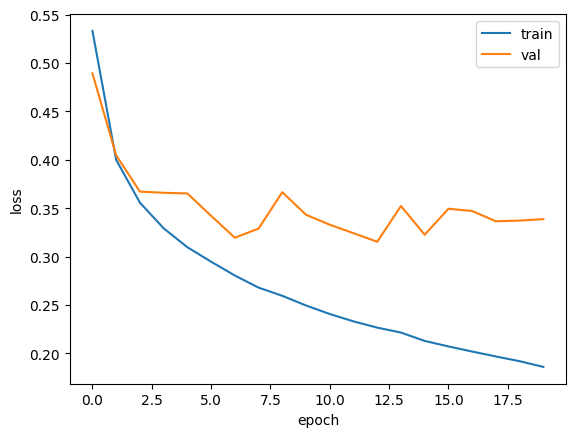

In [ ]:
# Adam 옵티마이저를 적용한 훈련 손실과 검증 손실 시각화
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
'''
과대적합이 현저하게 줄었다.
검증 손실 그래프에 여전히 요동이 남아 있지만 열 번째 에포크까지 전반적인 감소 추세가 이어지고 있다.
이는 Adam 옵티마이저가 이 데이터셋에 잘 맞는다는 것을 보여 준다.

물론 더 나은 손실 곡선을 얻으려면 학습률을 조정해서 다시 시도해 볼 수도 있다.
하지만 바로 다음 섹션으로 이동해 신경망에서 사용하는 대표적인 규제 방법을 알아보겠다.
'''

'\n과대적합이 현저하게 줄었다.\n검증 손실 그래프에 여전히 요동이 남아 있지만 열 번째 에포크까지 전반적인 감소 추세가 이어지고 있다.\n이는 Adam 옵티마이저가 이 데이터셋에 잘 맞는다는 것을 보여 준다.\n\n물론 더 나은 손실 곡선을 얻으려면 학습률을 조정해서 다시 시도해 볼 수도 있다.\n하지만 바로 다음 섹션으로 이동해 신경망에서 사용하는 대표적인 규제 방법을 알아보겠다.\n'

# **드롭아웃**

In [ ]:
'''
"드롭아웃(dropout)"은 훈련 과정에서 층에 있는 일부 뉴런을 랜덤하게 꺼서(즉 뉴런의 출력을 0으로 만들어) 과대적합을 막는다.

어떤 샘플을 처리할 때는 은닉층의 두 번째 뉴런이 드롭아웃되어 h2 출력이 없다.
다른 샘플을 처리할 때는 은닉층의 첫 번째 뉴런이 드롭아웃되어 h1 출력이 없다.
뉴런은 랜덤하게 드롭아웃되고 얼마나 많은 뉴런을 드롭할지는 사용자가 정해야 할 또 다른 하이퍼파라미터이다.

드롭아웃이 왜 과대적합을 막을까?
이전 층의 일부 뉴런이 랜덤하게 꺼지면 특정 뉴런에 과대하게 의존하는 것을 줄일 수 있고
모든 입력에 대해 주의를 기울여야 한다.
일부 뉴런의 출력이 없을 수 있다는 것을 감안하면 이 신경망은 더 안정적인 예측을 만들 수 있을 것이다.

또 다른 해석은 드롭아웃을 적용해 훈련하는 것은 마치 2개의 신경망을 앙상블 하는 것처럼 상상할 수 있다.
5장에서 보았듯이 앙상블은 과대적합을 막아 주는 아주 좋은 기법이다.

케라스에서는 드롭아웃을 keras.layers 패키지 아래 Dropout 클래스로 제공한다.
어떤 층의 뒤에 드롭아웃을 두어 이 층의 출력을 랜덤하게 0으로 만드는 것이다.
드롭아웃이 층처럼 사용되지만 훈련되는 모델 파라미터는 없다.

그럼 앞서 정의한 model_fn() 함수에 드롭아웃 객체를 전달하여 층을 추가해 보겠다.
여기에서는 30% 정도를 드롭아웃 한다.
만들어진 모델의 summary() 메서드를 사용해 드롭아웃 층이 잘 추가되었는지 확인해 보자.
'''

'\n"드롭아웃(dropout)"은 딥러닝의 아버지로 불리는 제프리 힌턴이 소개했다.\n이 방식은 다음 그림처럼 훈련 과정에서 층에 있는 일부 뉴런을 랜덤하게 꺼서(즉 뉴런의 출력을 0으로 만들어) 과대적합을 막는다.\n\n어떤 샘플을 처리할 때는 은닉층의 두 번째 뉴런이 드롭아웃되어 h2 출력이 없다.\n다른 샘플을 처리할 때는 은닉층의 첫 번째 뉴런이 드롭아웃되어 h1 출력이 없다.\n뉴런은 랜덤하게 드롭아웃되고 얼마나 많은 뉴런을 드롭할지는 사용자가 정해야 할 또 다른 하이퍼파라미터이다.\n\n드롭아웃이 왜 과대적합을 막을까?\n이전 층의 일부 뉴런이 랜덤하게 꺼지면 특정 뉴런에 과대하게 의존하는 것을 줄일 수 있고\n모든 입력에 대해 주의를 기울여야 한다.\n일부 뉴런의 출력이 없을 수 있다는 것을 감안하면 이 신경망은 더 안정적인 예측을 만들 수 있을 것이다.\n\n또 다른 해석은 드롭아웃을 적용해 훈련하는 것은 마치 2개의 신경망을 앙상블 하는 것처럼 상상할 수 있다.\n5장에서 보았듯이 앙상블은 과대적합을 막아 주는 아주 좋은 기법이다.\n\n케라스에서는 드롭아웃을 keras.layers 패키지 아래 Dropout 클래스로 제공한다.\n어떤 층의 뒤에 드롭아웃을 두어 이 층의 출력을 랜덤하게 0으로 만드는 것이다.\n드롭아웃이 층처럼 사용되지만 훈련되는 모델 파라미터는 없다.\n\n그럼 앞서 정의한 model_fn() 함수에 드롭아웃 객체를 전달하여 층을 추가해 보겠다.\n여기에서는 30% 정도를 드롭아웃 한다.\n만들어진 모델의 summary() 메서드를 사용해 드롭아웃 층이 잘 추가되었는지 확인해 보자.\n'

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
'''
출력 결과에서 볼 수 있듯이 은닉층 뒤에 추가된 드롭아웃 층은 훈련되는 모델 파라미터가 없다.
또한 입력과 출력의 크기가 같다.
일부 뉴런의 출력을 0으로 만들지만 전체 출력 배열의 크기를 바꾸지는 않는다.

물론 훈련이 끝난 뒤에 평가나 예측을 수행할 때는 드롭아웃을 적용하지 말아야 한다.
훈련된 모든 뉴런을 사용해야 올바른 예측을 수행할 수 있다.
그렇다면 모델을 훈련한 다음 층을 다시 빼야 할까? 아니다.
똑똑하게도 텐서플로와 케라스는 모델을 평가와 예측에 사용할 때는 자동으로 드롭아웃을 적용하지 않는다.
그래서 마음 편하게 검증 점수를 계산할 수 있다.
이전과 마찬가지로 훈련 손실과 검증 손실의 그래프를 그려 비교해 보겠다.
'''

'\n출력 결과에서 볼 수 있듯이 은닉층 뒤에 추가된 드롭아웃 층은 훈련되는 모델 파라미터가 없다.\n또한 입력과 출력의 크기가 같다.\n일부 뉴런의 출력을 0으로 만들지만 전체 출력 배열의 크기를 바꾸지는 않는다.\n\n물론 훈련이 끝난 뒤에 평가나 예측을 수행할 때는 드롭아웃을 적용하지 말아야 한다.\n훈련된 모든 뉴런을 사용해야 올바른 예측을 수행할 수 있다.\n그렇다면 모델을 훈련한 다음 층을 다시 빼야 할까? 아니다.\n똑똑하게도 텐서플로와 케라스는 모델을 평가와 예측에 사용할 때는 자동으로 드롭아웃을 적용하지 않는다.\n그래서 마음 편하게 검증 점수를 계산할 수 있다.\n이전과 마찬가지로 훈련 손실과 검증 손실의 그래프를 그려 비교해 보겠다.\n'

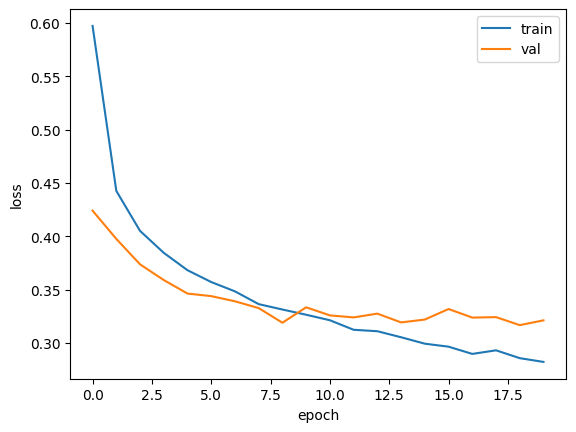

In [ ]:
# 훈련 손실과 검증 손실의 그래프 시각화를 통한 비교
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
'''
과대적합이 확실히 줄은 것을 확인할 수 있다.
열 번째 에포크 정도에서 검증 손실의 감소가 멈추지만 크게 상승하지 않고 어느 정도 유지되고 있다.

이 모델은 20번의 에포크 동안 훈련을 했기 때문에 결국 다소 과대적합 되어 있다.
그렇다면 과대적합 되지 않은 모델을 얻기 위해 에포크 횟수를 10으로 하고 다시 훈련해야겠다.
'''

'\n과대적합이 확실히 줄은 것을 확인할 수 있다.\n열 번째 에포크 정도에서 검증 손실의 감소가 멈추지만 크게 상승하지 않고 어느 정도 유지되고 있다.\n\n이 모델은 20번의 에포크 동안 훈련을 했기 때문에 결국 다소 과대적합 되어 있다.\n그렇다면 과대적합 되지 않은 모델을 얻기 위해 에포크 횟수를 10으로 하고 다시 훈련해야겠다.\n'

# **모델 저장과 복원**

In [ ]:
# 에포크 횟수 10으로 모델을 훈련
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=10, verbose=0,
                    validation_data=(val_scaled, val_target))

In [ ]:
'''
케라스 모델은 훈련된 모델의 파라미터를 저장하는 간편한 save_weights() 메서드를 제공하낟.
기본적으로 이 메서드는 텐서플로의 체크포인트 포맷으로 저장하지만 파이르이 확장자가 '.h5'일 경우 HDF5 포맷으로 저장한다.
'''

"\n케라스 모델은 훈련된 모델의 파라미터를 저장하는 간편한 save_weights() 메서드를 제공하낟.\n기본적으로 이 메서드는 텐서플로의 체크포인트 포맷으로 저장하지만 파이르이 확장자가 '.h5'일 경우 HDF5 포맷으로 저장한다.\n"

In [ ]:
model.save_weights('model.weights.h5')

# 가중치(파라미터)만 저장함

In [ ]:
'''
또한 모델 구조와 모델 파라미터를 함께 저장하는 save() 메서드도 제공한다.
기본적으로 이 메서드는 텐서플로의 SavedModel 포맷으로 저장하지만 파일의 확장자가 '.h5'일 경우 HDF5 포맷으로 저장한다.
'''

"\n또한 모델 구조와 모델 파라미터를 함께 저장하는 save() 메서드도 제공한다.\n기본적으로 이 메서드는 텐서플로의 SavedModel 포맷으로 저장하지만 파일의 확장자가 '.h5'일 경우 HDF5 포맷으로 저장한다.\n"

In [ ]:
model.save('model-whole.keras')

In [ ]:
# 두 파일의 생성 결과 확인
!ls -al model*

-rw-r--r-- 1 root root 971928 Jan 10 10:37 model.weights.h5
-rw-r--r-- 1 root root 974764 Jan 10 10:37 model-whole.keras


In [ ]:
'''
두 가지 실험을 해 보자.
첫 번째는 훈련을 하지 않은 새로운 모델을 만들고 model-weights.h5 파일에서 훈련된 모델 파라미터를 읽어서 사용한다.
두 번재는 아예 model-whole.h5 파일에서 새로운 모델을 만들어 바로 사용한다.
먼저 첫 번째 실험부터 시작한다.
'''

'\n두 가지 실험을 해 보자.\n첫 번째는 훈련을 하지 않은 새로운 모델을 만들고 model-weights.h5 파일에서 훈련된 모델 파라미터를 읽어서 사용한다.\n두 번재는 아예 model-whole.h5 파일에서 새로운 모델을 만들어 바로 사용한다.\n먼저 첫 번째 실험부터 시작한다.\n'

In [ ]:
# 첫 번째 실험
model = model_fn(keras.layers.Dropout(0.3))

model.load_weights('model.weights.h5')

In [ ]:
'''
훈련하지 않은 새로운 모델을 만들고 이전에 저장했던 모델 파라미터를 적재했다.
이때 사용하는 메서드는 save)weights()와 쌍을 이루는 load_weights() 메서드이다.

모델 파라미터를 적재하는 조건이 있을까?
load_weights() 메서드를 사용하려면 save_weights() 메서드로 저장했던 모델과 정확히 같은 구조를 가져야 한다.
그렇지 않으면 에러가 발생한다.
여기에서는 model_fn() 함수를 사용해 동일한 모델을 만들어 사용했다.

이 모델의 검증 정확도를 확인해 보겠다.
케라스에서 예측을 수행하는 predict() 메서드는 사이킷런과 달리
샘플마다 10개의 클래스에 대한 확률을 반환한다.
패션 MNIST 데이터셋이 다중 분류 문제이기 때문이다.
(이진 분류 문제라면 양성 클래스에 대한 확률 하나만 반환한다.)

패션 MNIST 데이터셋에서 덜어낸 검증 세트의 샘플 개수는 12,000개이기 때문에
predict() 메서드는 (12000, 10)크기의 배열을 반환한다.
따라서 조금 번거롭지만 10개 확률 중에 가장 큰 값의 인덱스를 골라
타깃 레이블과 비교하여 정확도를 계산해 보겠다.

evaluate() 메서드를 왜 사용하지 않을까?
모델 파라미터를 읽은 후 evaluate() 메서드를 사용하여 정확도를 출력할 수도 있다.
하지만 evaluate() 메서드는 손실을 계산하기 위해 반드시 먼저 compile() 메서드를 실행해야 한다.
여기에서는 새로운 데이터에 대해 정확도만 계산하면 되는 상황이라고 가정한다.
'''

'\n훈련하지 않은 새로운 모델을 만들고 이전에 저장했던 모델 파라미터를 적재했다.\n이때 사용하는 메서드는 save)weights()와 쌍을 이루는 load_weights() 메서드이다.\n\n모델 파라미터를 적재하는 조건이 있을까?\nload_weights() 메서드를 사용하려면 save_weights() 메서드로 저장했던 모델과 정확히 같은 구조를 가져야 한다.\n그렇지 않으면 에러가 발생한다.\n여기에서는 model_fn() 함수를 사용해 동일한 모델을 만들어 사용했다.\n\n이 모델의 검증 정확도를 확인해 보겠다.\n케라스에서 예측을 수행하는 predict() 메서드는 사이킷런과 달리\n샘플마다 10개의 클래스에 대한 확률을 반환한다.\n패션 MNIST 데이터셋이 다중 분류 문제이기 때문이다.\n(이진 분류 문제라면 양성 클래스에 대한 확률 하나만 반환한다.)\n\n패션 MNIST 데이터셋에서 덜어낸 검증 세트의 샘플 개수는 12,000개이기 때문에\npredict() 메서드는 (12000, 10)크기의 배열을 반환한다.\n따라서 조금 번거롭지만 10개 확률 중에 가장 큰 값의 인덱스를 골라\n타깃 레이블과 비교하여 정확도를 계산해 보겠다.\n\nevaluate() 메서드를 왜 사용하지 않을까?\n모델 파라미터를 읽은 후 evaluate() 메서드를 사용하여 정확도를 출력할 수도 있다.\n하지만 evaluate() 메서드는 손실을 계산하기 위해 반드시 먼저 compile() 메서드를 실행해야 한다.\n여기에서는 새로운 데이터에 대해 정확도만 계산하면 되는 상황이라고 가정한다.\n'

In [ ]:
# 가장 큰 확률 값의 인덱스를 타깃 레이블과 비교하여 정확도 계산
import numpy as np

val_labels = np.argmax(model.predict(val_scaled), axis=-1)

print(np.mean(val_labels == val_target))

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
0.87475


In [ ]:
'''
모델의 predict() 메서드 결과에서 가장 큰 값을 고르기 위해 넘파이 argmax() 함수를 사용했다.
이 함수는 배열에서 가장 큰 값의 인덱스를 반환한다.
예를 들어 배열의 첫 번째 원소가 가장 큰 값일 경우 0을 반환한다.
다행히 우리가 준비한 타깃값도 0부터 시작하기 때문에 비교하기 좋다.

argmax() 함수의 axis=-1은 배열이 마지막 차원을 따라 최댓값을 고른다.
검증 세트는 2차원 배열이기 때문에 마지막 차원은 1이 된다.

axis=1이면 열을 따라 각 행의 최대값의 인덱스를 선택하고, axis=0이면 행을 따라 각 열의 최댓값의 인덱스를 선택하낟.

그다음 라인은 argmax()로 고른 인덱스(val_lab)와 타깃(val_target)을 비교한다.
두 배열에서 각 위치의 값이 같으면 1이 되고 다르면 0이 된다.
이를 평균하면 정확도가 된다.

이번에는 모델 전체를 파일에서 읽은 다음 검증 세트의 정확도를 출력해 보겠다.
모델이 저장된 파일을 읽을 때는 케라스가 제공하는 load_model() 함수를 사용한다.
'''

'\n모델의 predict() 메서드 결과에서 가장 큰 값을 고르기 위해 넘파이 argmax() 함수를 사용했다.\n이 함수는 배열에서 가장 큰 값의 인덱스를 반환한다.\n예를 들어 배열의 첫 번째 원소가 가장 큰 값일 경우 0을 반환한다.\n다행히 우리가 준비한 타깃값도 0부터 시작하기 때문에 비교하기 좋다.\n\nargmax() 함수의 axis=-1은 배열이 마지막 차원을 따라 최댓값을 고른다.\n검증 세트는 2차원 배열이기 때문에 마지막 차원은 1이 된다.\n\naxis=1이면 열을 따라 각 행의 최대값의 인덱스를 선택하고, axis=0이면 행을 따라 각 열의 최댓값의 인덱스를 선택하낟.\n\n그다음 라인은 argmax()로 고른 인덱스(val_lab)와 타깃(val_target)을 비교한다.\n두 배열에서 각 위치의 값이 같으면 1이 되고 다르면 0이 된다.\n이를 평균하면 정확도가 된다.\n\n이번에는 모델 전체를 파일에서 읽은 다음 검증 세트의 정확도를 출력해 보겠다.\n모델이 저장된 파일을 읽을 때는 케라스가 제공하는 load_model() 함수를 사용한다.\n'

In [ ]:
model = keras.models.load_model('model-whole.keras')

model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8735 - loss: 0.3451


[0.34537458419799805, 0.874750018119812]

In [ ]:
'''
그런데 이 과정을 돌이켜 보면 20번의 에포크 동안 모델을 훈련하여 검증 점수가 상승하는 지점을 확인했다.
그다음 모델을 과대적합 되지 않는 에포크만큼 다시 훈련했다.
모델을 두 번씩 훈련하지 않고 한 번에 끝낼 수는 없을까?
드디어 케라스의 콜백을 사용할 차례이다.
'''

'\n그런데 이 과정을 돌이켜 보면 20번의 에포크 동안 모델을 훈련하여 검증 점수가 상승하는 지점을 확인했다.\n그다음 모델을 과대적합 되지 않는 에포크만큼 다시 훈련했다.\n모델을 두 번씩 훈련하지 않고 한 번에 끝낼 수는 없을까?\n드디어 케라스의 콜백을 사용할 차례이다.\n'

# **콜백**

In [ ]:
'''
"콜백(callback)"은 훈련 과정 중간에 어떤 작업을 수행할 수 있게 하는 객체로 keras.callbacks 패키지 아래 있는 클래스들이다.
fit() 메서드의 callbacks 매개변수에 리스트로 전달하여 사용한다.
여기서 사용할 ModelCheckpoint 콜백은 기본적으로 에포크마다 모델을 저장한다.
save_best_only=True 매개변수를 지정하여 가장 낮은 검증 점수를 만드는 모델을 저장할 수 있다.
저장될 파일 이름을 'best-model.keras'로 지정하여 콜백을 적용해 보겠다.
'''

'\n"콜백(callback)"은 훈련 과정 중간에 어떤 작업을 수행할 수 있게 하는 객체로 keras.callbacks 패키지 아래 있는 클래스들이다.\nfit() 메서드의 callbacks 매개변수에 리스트로 전달하여 사용한다.\n여기서 사용할 ModelCheckpoint 콜백은 기본적으로 에포크마다 모델을 저장한다.\nsave_best_only=True 매개변수를 지정하여 가장 낮은 검증 점수를 만드는 모델을 저장할 수 있다.\n저장될 파일 이름을 \'best-model.h5\'로 지정하여 콜백을 적용해 보겠다.\n'

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras',
                                                save_best_only=True)

model.fit(train_scaled, train_target, epochs=20, verbose=0,
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb])

In [ ]:
'''
model_fn() 함수로 모델을 만들고 compile() 메서드를 호출하는 것은 이전과 동일하다.
ModelCheckpoint 클래스의 객체 cehckpoint_cb를 만든 후 fit() 메서드의 callbacks 매개변수에 리스트로 감싸서 전달한다.
모델이 훈련한 후에 best-model.keras에 최상의 검증 점수를 낸 모델이 저장된다.
이 모델을 load_model() 함수로 다시 읽어서 예측을 수행해 보자.
'''

'\nmodel_fn() 함수로 모델을 만들고 compile() 메서드를 호출하는 것은 이전과 동일하다.\nModelCheckpoint 클래스의 객체 cehckpoint_cb를 만든 후 fit() 메서드의 callbacks 매개변수에 리스트로 감싸서 전달한다.\n모델이 훈련한 후에 best-model.keras에 최상의 검증 점수를 낸 모델이 저장된다.\n이 모델을 load_model() 함수로 다시 읽어서 예측을 수행해 보자.\n'

In [ ]:
model = keras.models.load_model('best-model.keras')

model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8866 - loss: 0.3184


[0.3159323036670685, 0.8851666450500488]

In [ ]:
'''
사실 검증 점수가 상승하기 시작하면 그 이후에는 과대적합이 더 커지기 때문에 훈련을 계속할 필요가 없다.
이때 훈련을 중지하면 컴퓨터 자원과 시간을 아낄 수 있다.
이렇게 과대적합이 시작되기 전에 훈련을 미리 중지하는 것을 "조기 종료(early stopping)"라고 부르며, 딥러닝에서 널리 사용한다.

조기 종료는 훈련 에포크 횟수를 제한하는 역할이지만
모델이 과대적합되는 것을 막아 주기 때문에 규제 방법 중 하나로 생각할 수도 있다.

케라스에는 조기 종료를 위한 EarlyStopping 콜백을 제공한다.
이 콜백의 patience 매개변수 patience=2로 지정하면, 2번 연속 검증 점수가 향상되지 않으면 훈련을 중지한다.
또한 restore_best_weights 매개변수를 True로 지정하면 가장 낮은 검증 손실을 낸 모델 파라미터로 되돌린다.

EarlyStopping 콜백을 ModelCheckpoint 콜백과 함께 사용하면 가장 낮은 검증 손실의 모델을 파일에 저장하고
검증 손실이 다시 상승할 때 훈련을 중지할 수 있다.
또한 훈련을 중지한 다음 현재 모델의 파라미터를 최상의 파라미터로 되돌린다.

이 두 콜백을 함께 사용해보자.
'''

'\nModelCheckpoint 콜백이 가장 낮은 검증 점수의 모델을 자동으로 저장해 주어 훨씬 편리하다.\n하지만 여전히 20번의 에포크 동안 훈련을 한다.\n사실 검증 점수가 상승하기 시작하면 그 이후에는 과대적합이 더 커지기 때문에 훈련을 계속할 필요가 없다.\n이때 훈련을 중지하면 컴퓨터 자원과 시간을 아낄 수 있다.\n이렇게 과대적합이 시작되기 전에 훈련을 미리 중지하는 것을 "조기 종료(early stopping)"라고 부르며, 딥러닝에서 널리 사용한다.\n\n조기 종료는 훈련 에포크 횟수를 제한하는 역할이지만\n모델이 과대적합되는 것을 막아 주기 때문에 규제 방법 중 하나로 생각할 수도 있다.\n\n케라스에는 조기 종료를 위한 EarlyStopping 콜백을 제공한다.\n이 콜백의 patience 매개변수 patience=2로 지정하면, 2번 연속 검증 점수가 향상되지 않으면 훈련을 중지한다.\n또한 restore_best_weights 매개변수를 True로 지정하면 가장 낮은 검증 손실을 낸 모델 파라미터로 되돌린다.\n\nEarlyStopping 콜백을 ModelCheckpoint 콜백과 함께 사용하면 가장 낮은 검증 손실의 모델을 파일에 저장하고\n검증 손실이 다시 상승할 때 훈련을 중지할 수 있다.\n또한 훈련을 중지한 다음 현재 모델의 파라미터를 최상의 파라미터로 되돌린다.\n\n이 두 콜백을 함께 사용해보자.\n'

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

In [ ]:
'''
EarlyStopping 콜백을 추가한 것 외에는 이전과 동일하다.
fit() 메서드의 callbacks 매개변수에 2개의 콜백을 리스트로 전달한 것을 눈여겨보자.
훈련을 마치고 나면 몇 번째 에포크에서 훈련이 중지되었는지 early_stopping_cb 객체의 stopped_epoch 속성에서 확인 가능하다.
'''

'\nEarlyStopping 콜백을 추가한 것 외에는 이전과 동일하다.\nfit() 메서드의 callbacks 매개변수에 2개의 콜백을 리스트로 전달한 것을 눈여겨보자.\n훈련을 마치고 나면 몇 번째 에포크에서 훈련이 중지되었는지 early_stopping_cb 객체의 stopped_epoch 속성에서 확인 가능하다.\n'

In [ ]:
print(early_stopping_cb.stopped_epoch)

# 8번째 에포크부터 훈련이 중지된 것을 의미함(에포크 횟수는 0부터 시작하니까)
# patience를 2로 지정했으므로 최상의 모델은 5번째 에포크일 것임

7


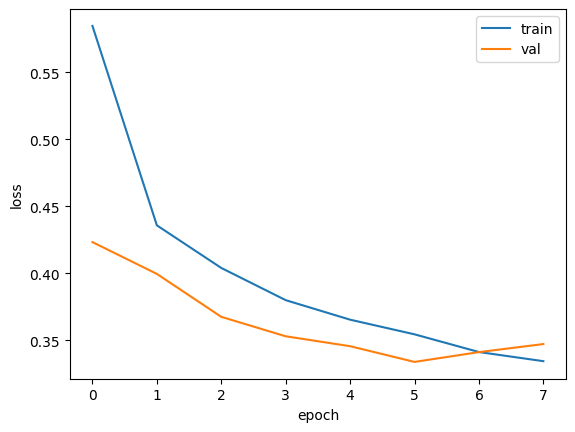

In [ ]:
# 훈련 손실과 검증 손실 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
'''
그래프에서 알 수 있듯이 5번째 에포크에서 가장 낮은 손실을 기록했고 8번째 에포크에서 훈련이 중지되었다.
조기 종료 기법을 사용하면 안심하고 에포크 횟수를 크게 지정해도 괜찮다.
컴퓨터 자원과 시간을 아낄 수 있고 ModelCheckpoint 콜백과 함께 사용하면 최상의 모델을 자동으로 저장해 주므로 편리하다.
'''

'\n그래프에서 알 수 있듯이 5번째 에포크에서 가장 낮은 손실을 기록했고 8번째 에포크에서 훈련이 중지되었다.\n조기 종료 기법을 사용하면 안심하고 에포크 횟수를 크게 지정해도 괜찮다.\n컴퓨터 자원과 시간을 아낄 수 있고 ModelCheckpoint 콜백과 함께 사용하면 최상의 모델을 자동으로 저장해 주므로 편리하다.\n'

In [ ]:
# 검증 세트 성능 확인
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8789 - loss: 0.3321


[0.33372965455055237, 0.878083348274231]